In [18]:
from sklearn.metrics import accuracy_score, mean_squared_error
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import joblib
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [19]:
data=pd.read_csv('hrt_dataset.csv')
data.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


In [20]:
data.shape

(303, 14)

In [21]:
data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
data['target'].unique()

array([1, 0], dtype=int64)

In [23]:
data1=data[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]

<Axes: xlabel='target', ylabel='count'>

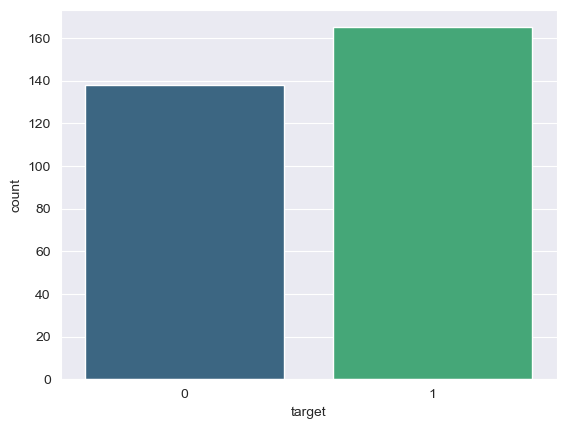

In [24]:
sns.set_style('darkgrid')
sns.countplot(x='target',data=data,palette='viridis')

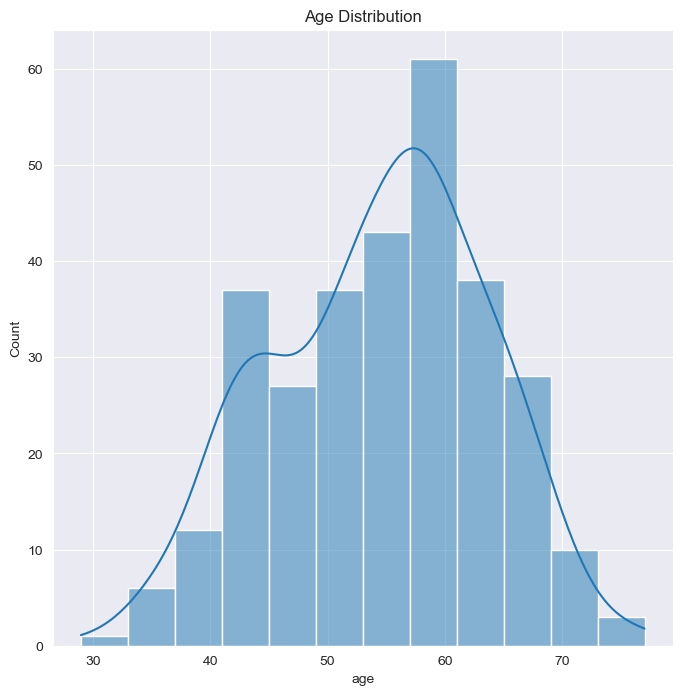

In [25]:
plt.figure(figsize=(8,8))
plt.title("Age Distribution")
sns.histplot(data=data, x='age', kde=True)
plt.show()

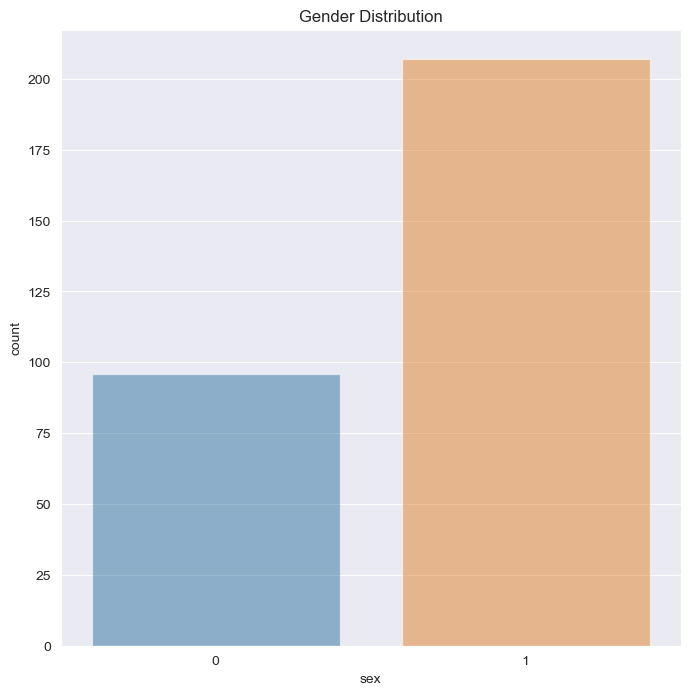

In [26]:
plt.figure(figsize=(8,8))
plt.title("Gender Distribution")
sns.countplot(data=data, x='sex', alpha=0.5)
plt.show()

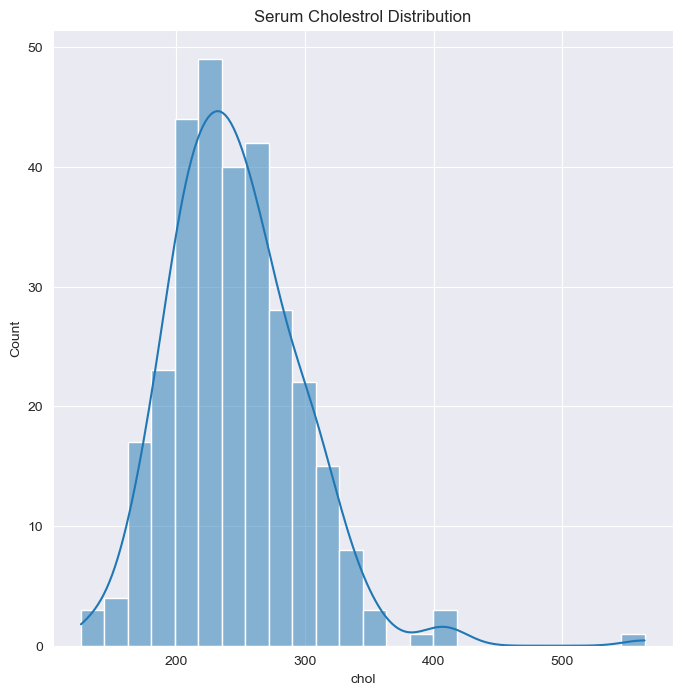

In [27]:
plt.figure(figsize=(8,8))
plt.title("Serum Cholestrol Distribution")
sns.histplot(data=data, x='chol', kde=True)
plt.show()

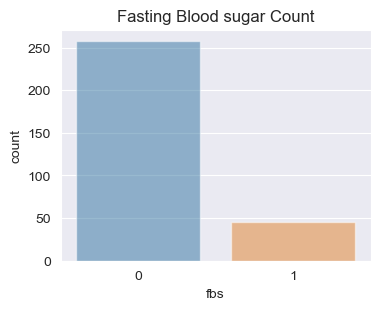

In [28]:
plt.figure(figsize=(4,3))
plt.title("Fasting Blood sugar Count")
sns.countplot(data=data, x='fbs', alpha=0.5)
plt.show()

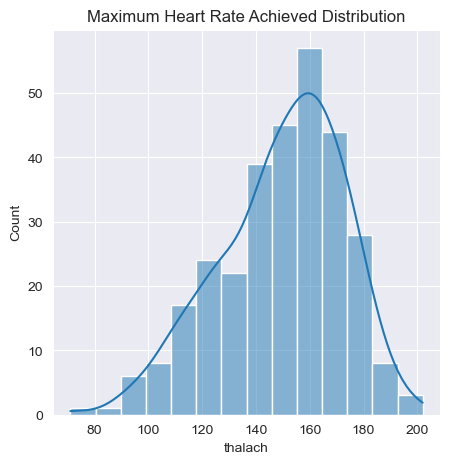

In [29]:
plt.figure(figsize=(5,5))
plt.title("Maximum Heart Rate Achieved Distribution")
sns.histplot(data=data, x='thalach', kde=True)
plt.show()

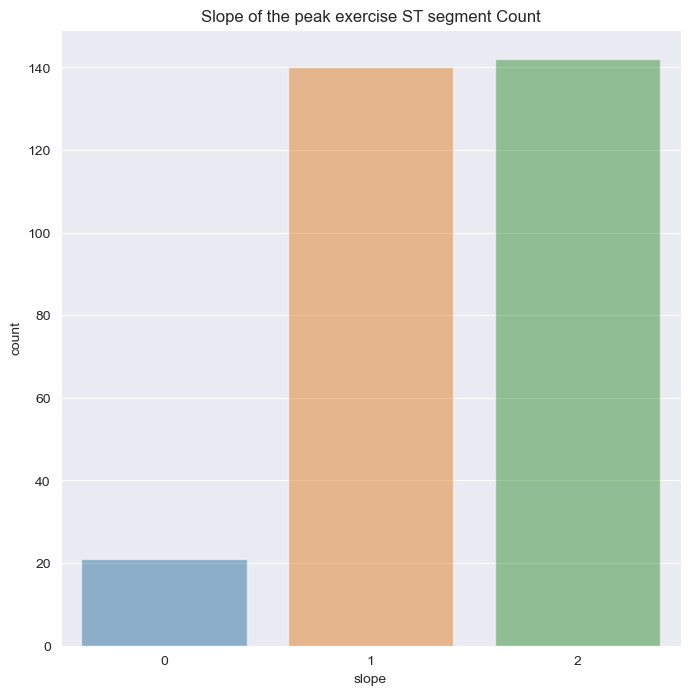

In [30]:
plt.figure(figsize=(8,8))
plt.title("Slope of the peak exercise ST segment Count")
sns.countplot(data=data, x='slope', alpha=0.5)
plt.show()

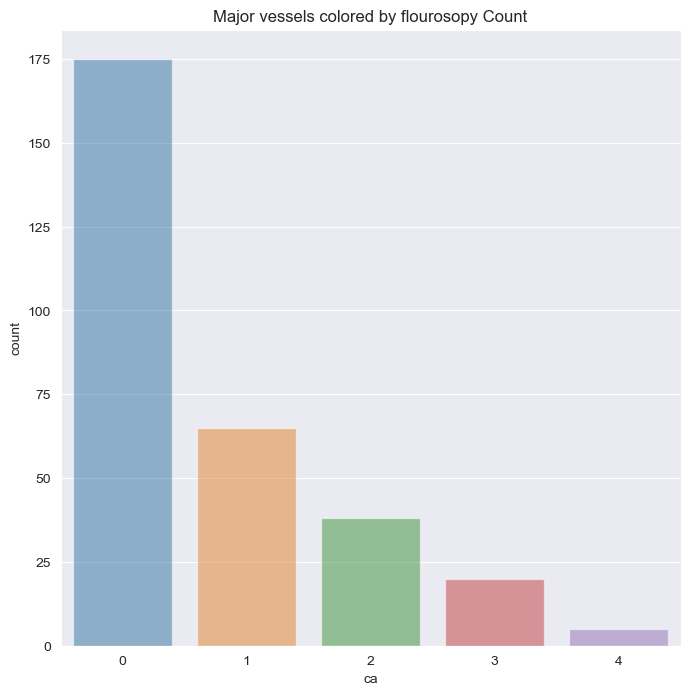

In [31]:
plt.figure(figsize=(8,8))
plt.title("Major vessels colored by flourosopy Count")
sns.countplot(data=data, x='ca', alpha=0.5)
plt.show()

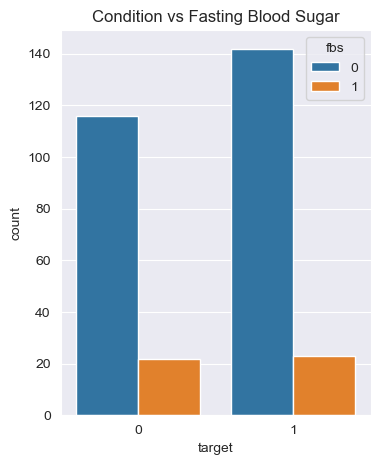

In [32]:
# Condition vs Fasting Blood Sugar
plt.figure(figsize=(4,5))
plt.title("Condition vs Fasting Blood Sugar")
sns.countplot(data=data, x='target', hue='fbs')
plt.show()

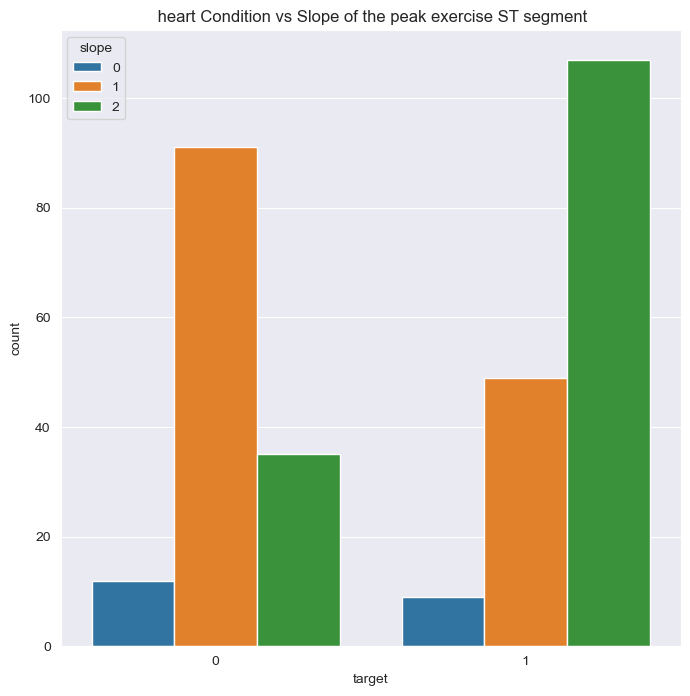

In [33]:
plt.figure(figsize=(8,8))
plt.title(" heart Condition vs Slope of the peak exercise ST segment")
sns.countplot(data=data, x='target', hue='slope')
plt.show()

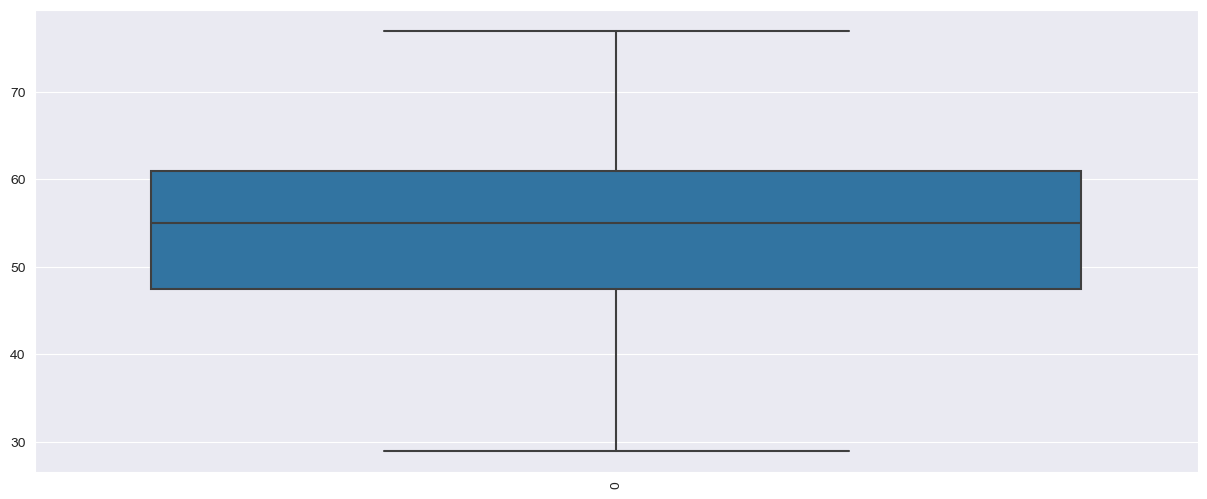

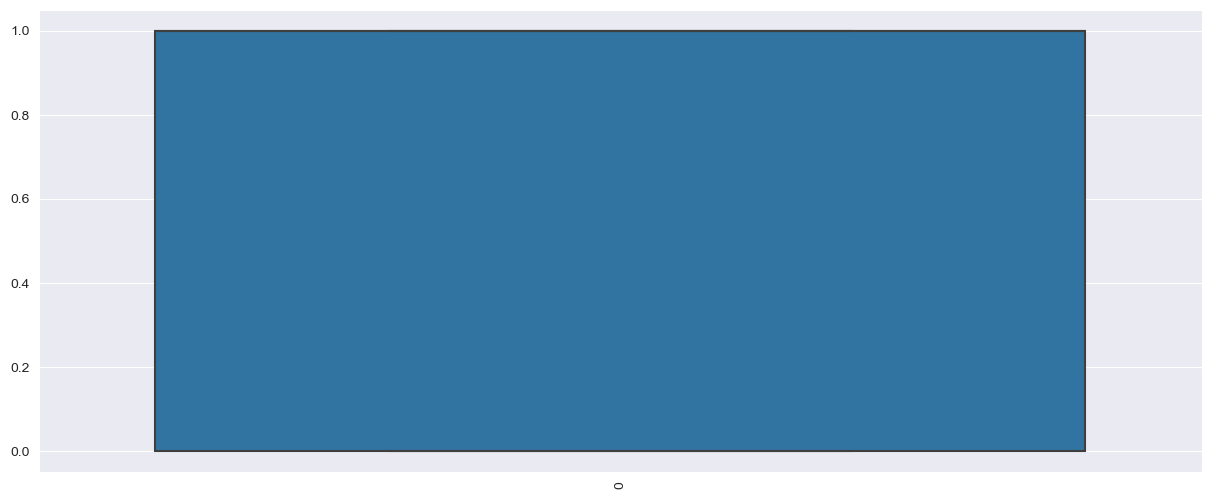

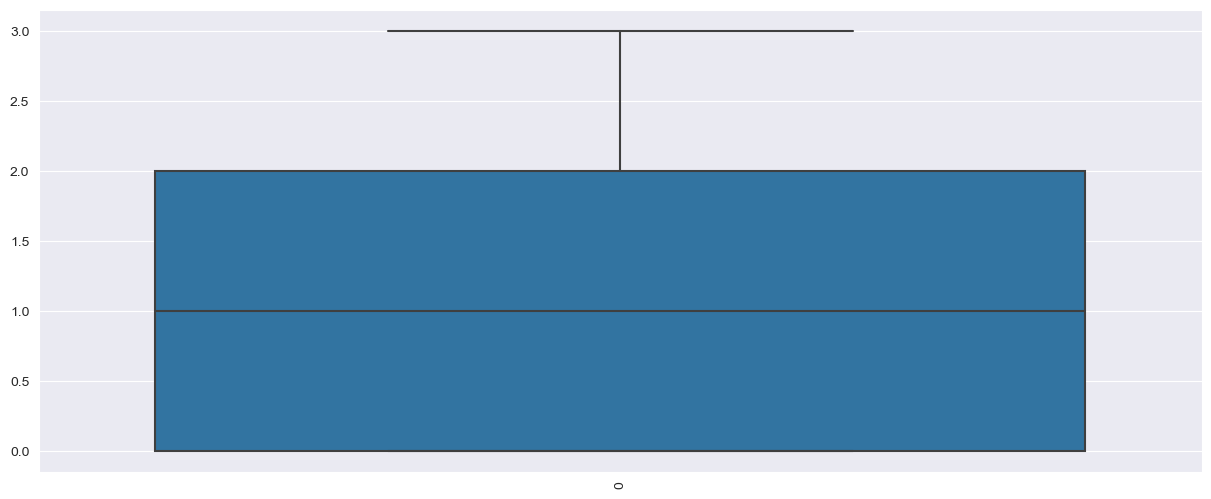

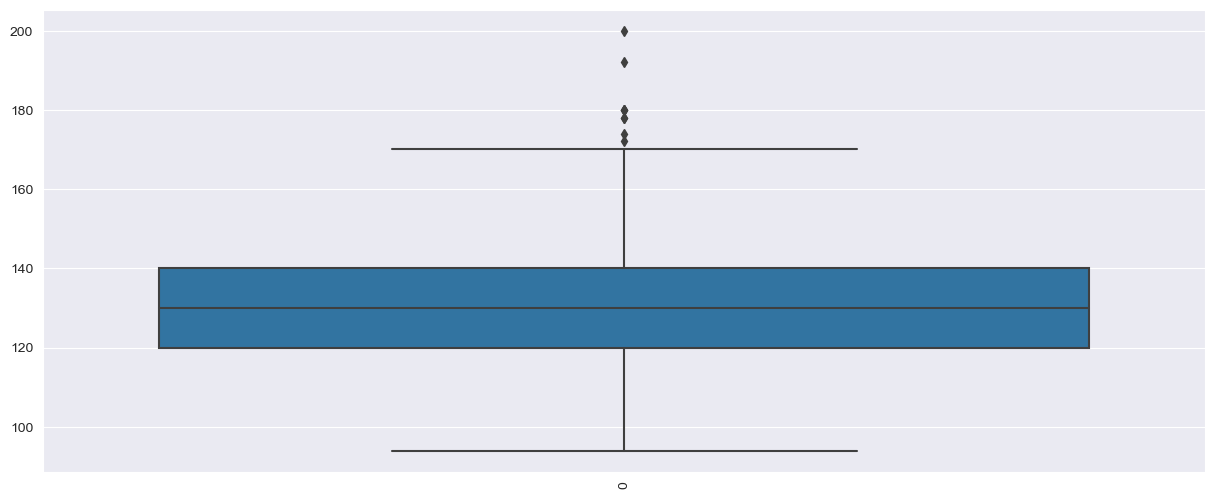

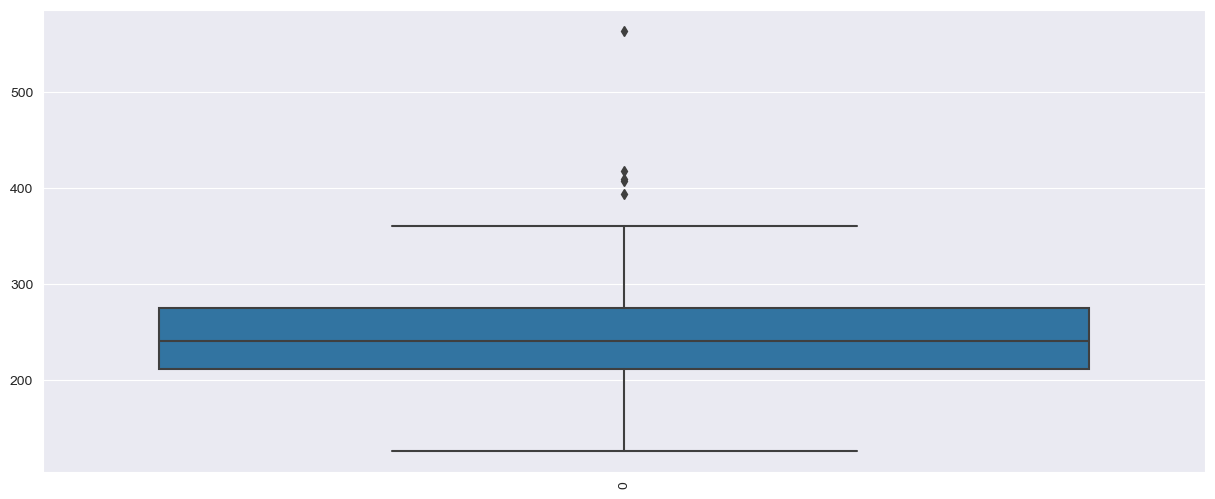

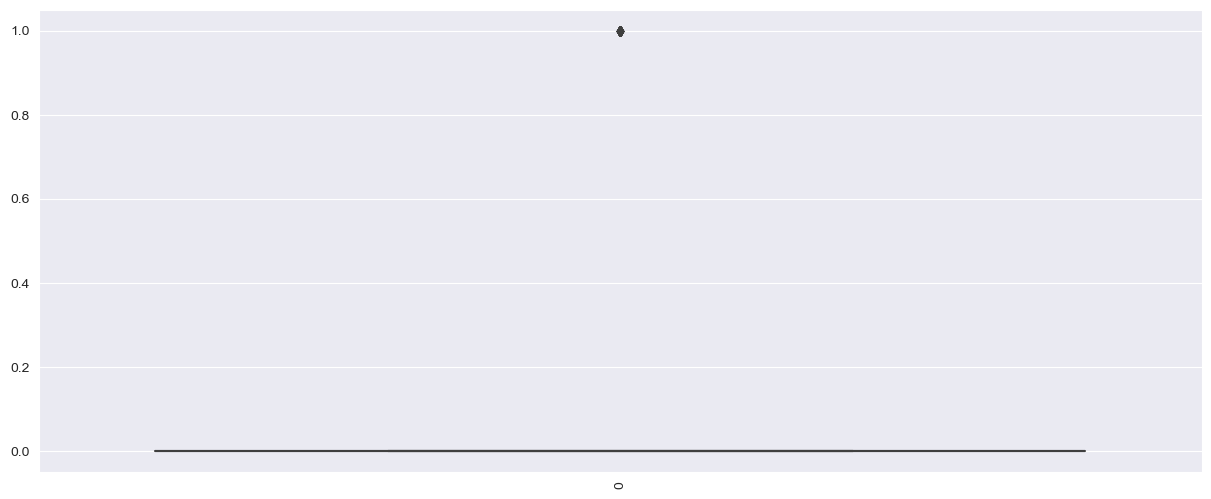

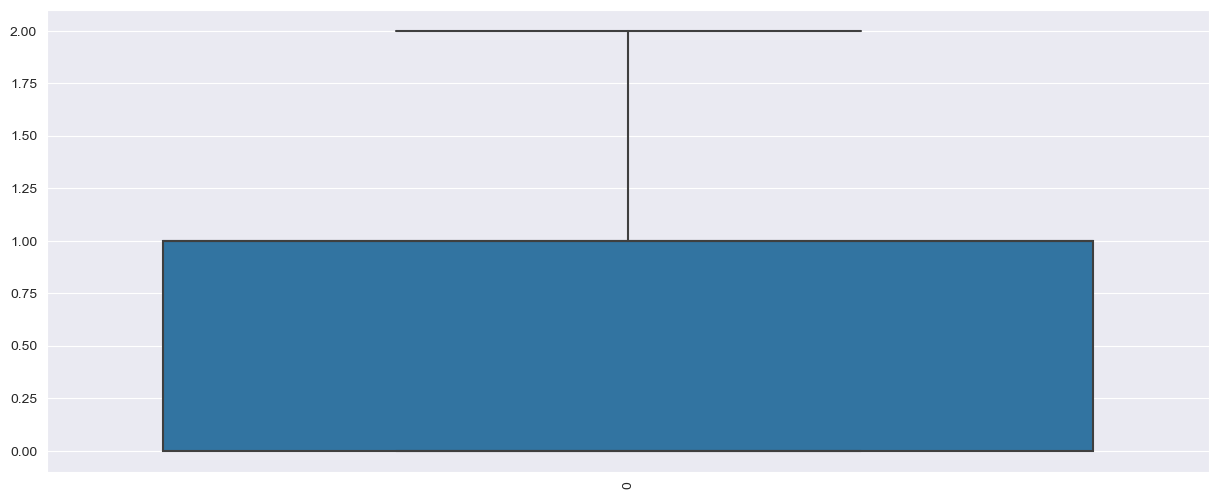

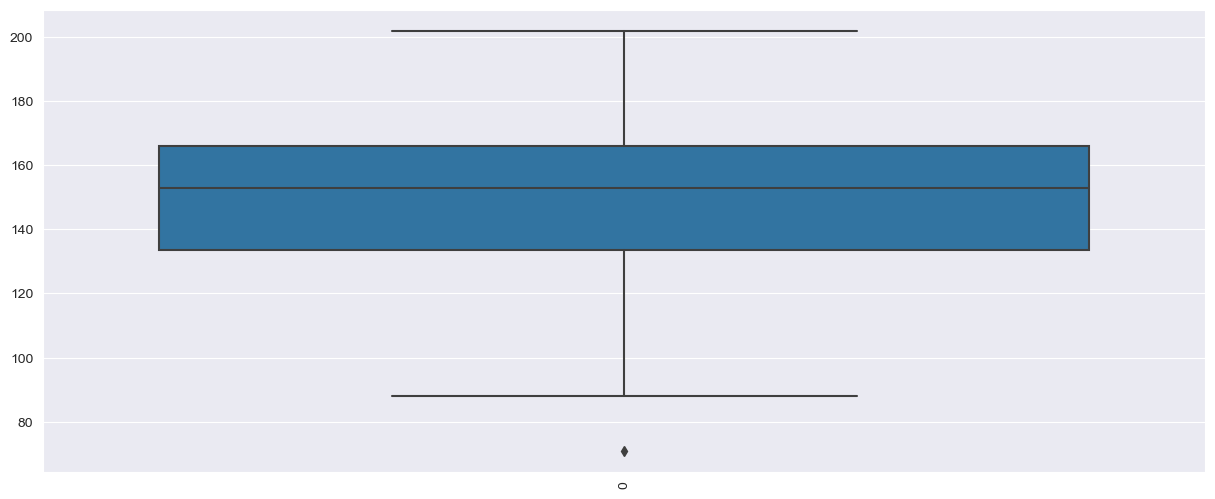

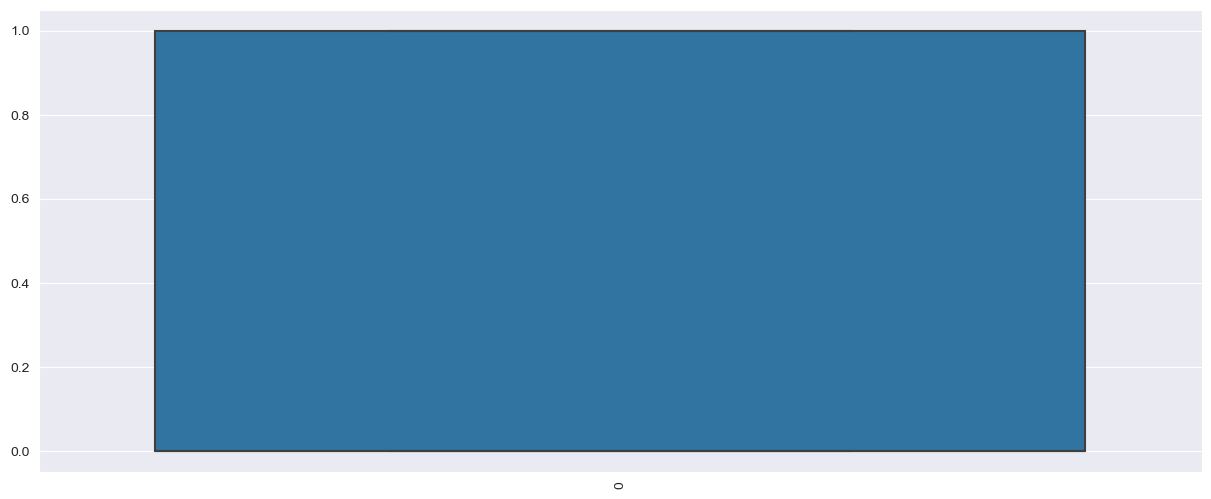

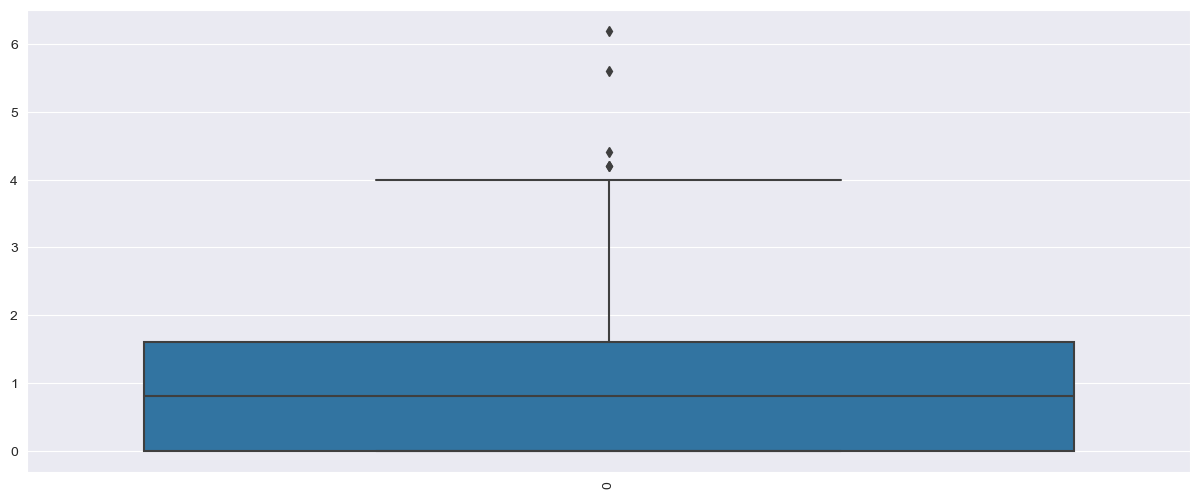

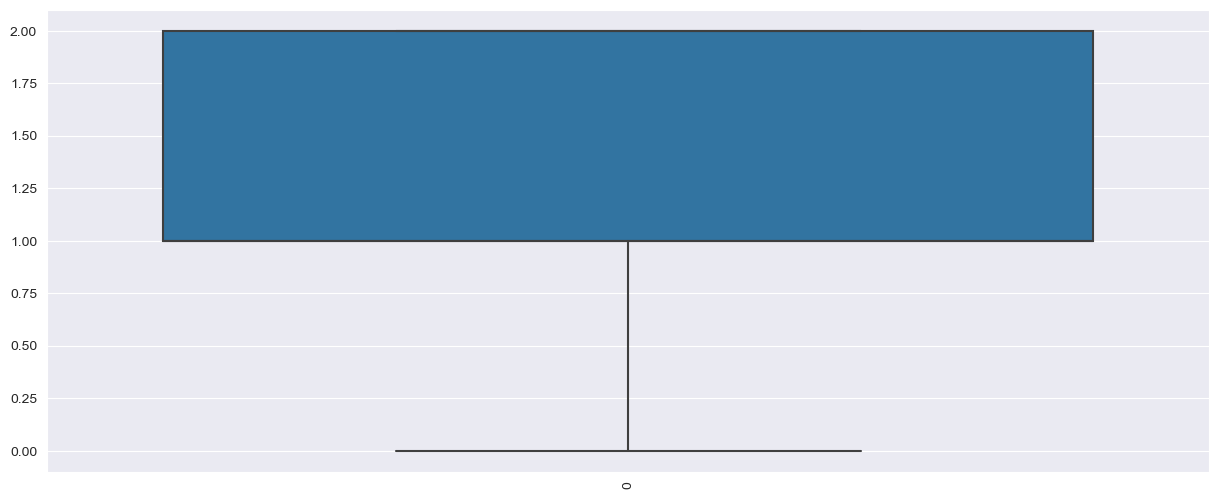

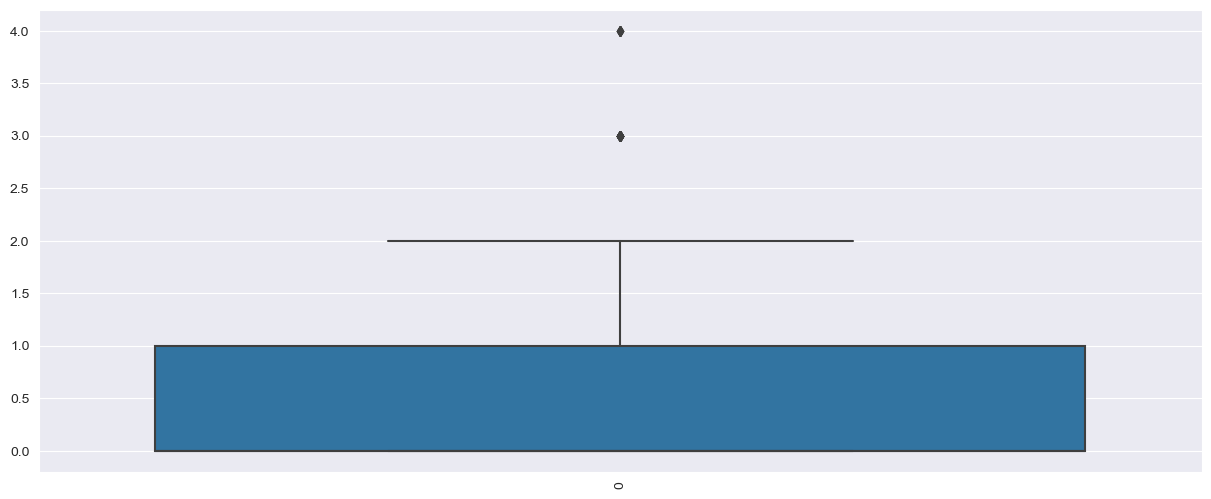

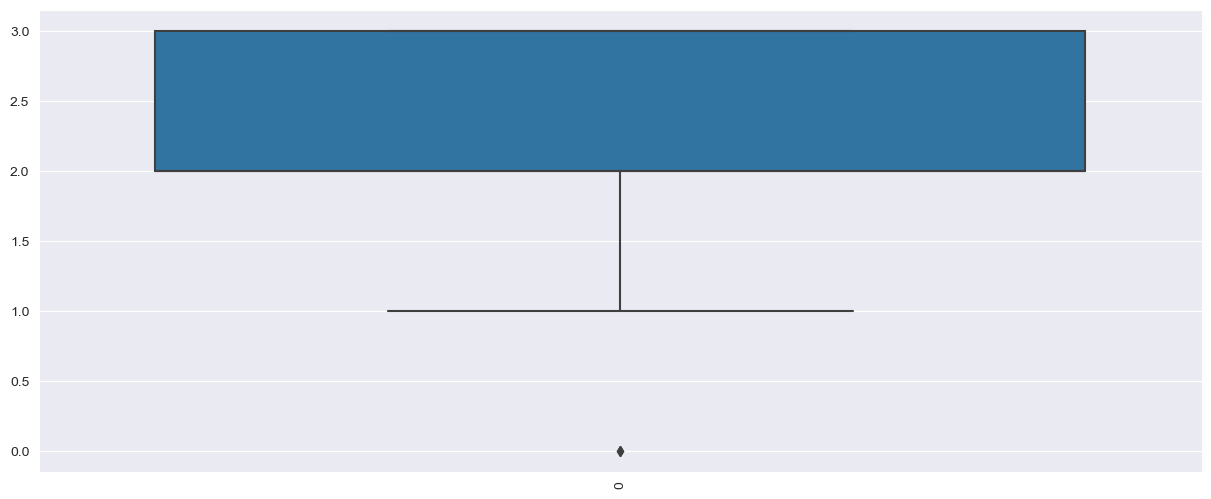

In [34]:
for i in data1.columns:
    plt.figure(figsize=(15,6))
    sns.boxplot(data1[i])
    plt.xticks(rotation=90)
    plt.show()

In [35]:
X=data.drop(columns=('target'))
y=data['target']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,
                                                    shuffle = True, random_state = 0)

C:\Users\PC\anaconda311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


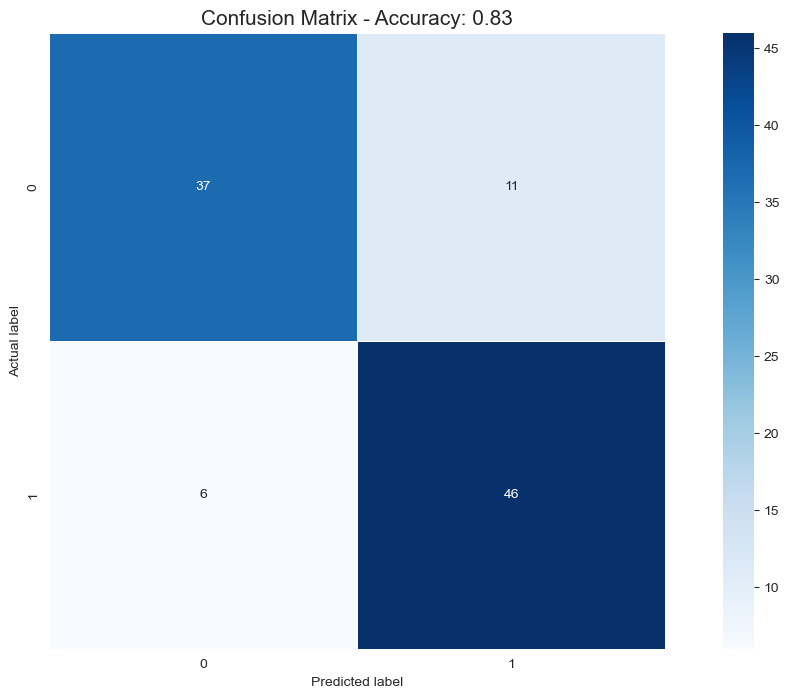

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression if not already imported

# Assuming you have training data X_train and corresponding labels y_train
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier_lr.predict(X_test)

# Calculate confusion matrix and accuracy score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(15, 8))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'Confusion Matrix - Accuracy: {accuracy:.2f}', size=15)
plt.show()

In [38]:
y_pred = classifier_lr.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('Logistic Regression Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Logistic Regression Model accuracy score: 0.8300


In [40]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('Logistic Regression Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Logistic Regression Model accuracy score: 0.8300


In [41]:
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [42]:
y_pred=classifier.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('Decision Tree Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Decision Tree Model accuracy score: 0.7600


In [44]:
y_pred=classifier.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('Random Forest Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Random Forest Model accuracy score: 0.7600


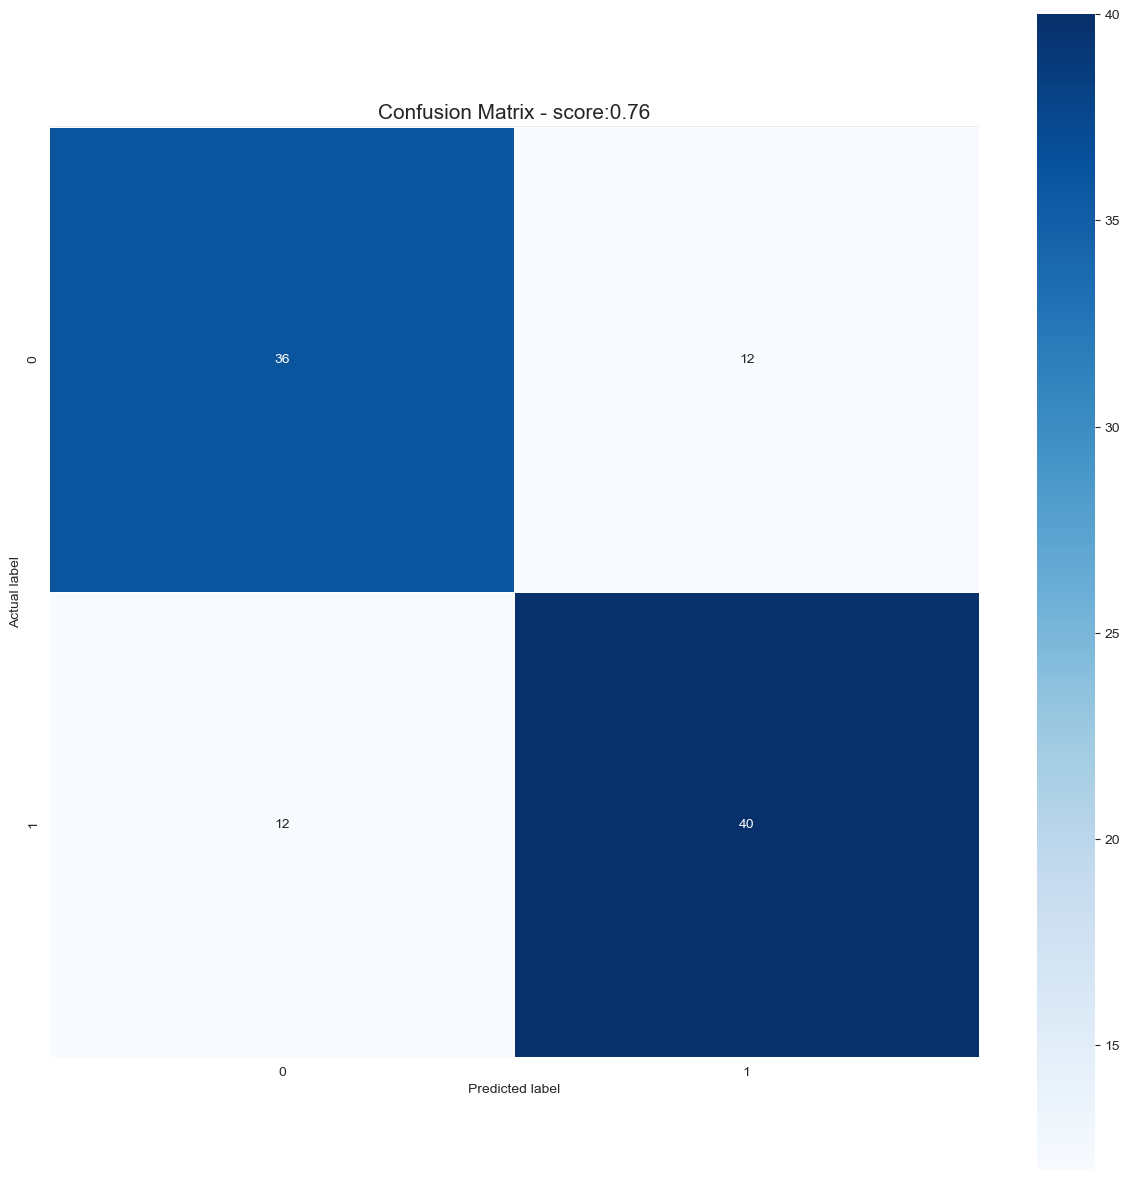

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

In [47]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import joblib
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data['age'] = label_encoder.fit_transform(data['age'])
data['sex'] = label_encoder.fit_transform(data['sex'])
data['cp'] = label_encoder.fit_transform(data['cp'])
data['trestbps'] = label_encoder.fit_transform(data['trestbps'])
data['chol'] = label_encoder.fit_transform(data['chol'])
data['fbs'] = label_encoder.fit_transform(data['fbs'])
data['restecg'] = label_encoder.fit_transform(data['restecg'])
data['thalach'] = label_encoder.fit_transform(data['thalach'])
data['exang'] = label_encoder.fit_transform(data['exang'])
data['oldpeak'] = label_encoder.fit_transform(data['oldpeak'])
data['slope'] = label_encoder.fit_transform(data['slope'])
data['ca'] = label_encoder.fit_transform(data['ca'])
data['thal'] = label_encoder.fit_transform(data['thal'])

X = data.drop(columns=['target'])
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

model = LogisticRegression()
model.fit(X_train, y_train)

joblib.dump(model, 'samtech1.pkl')

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import joblib
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data['age'] = label_encoder.fit_transform(data['age'])
data['sex'] = label_encoder.fit_transform(data['sex'])
data['cp'] = label_encoder.fit_transform(data['cp'])
data['trestbps'] = label_encoder.fit_transform(data['trestbps'])
data['chol'] = label_encoder.fit_transform(data['chol'])
data['fbs'] = label_encoder.fit_transform(data['fbs'])
data['restecg'] = label_encoder.fit_transform(data['restecg'])
data['thalach'] = label_encoder.fit_transform(data['thalach'])
data['exang'] = label_encoder.fit_transform(data['exang'])
data['oldpeak'] = label_encoder.fit_transform(data['oldpeak'])
data['slope'] = label_encoder.fit_transform(data['slope'])
data['ca'] = label_encoder.fit_transform(data['ca'])
data['thal'] = label_encoder.fit_transform(data['thal'])

X = data.drop(columns=['target'])
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

model = LogisticRegression()
model.fit(X_train, y_train)

joblib.dump(model, 'sambb.pkl')

C:\Users\PC\anaconda311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['sambb.pkl']

In [56]:
import pandas as pd
import joblib

# Load the trained model
loaded_model = joblib.load('sambb.pkl')

# Assuming you have a new dataset with specific values
new_data_values = {
    'age':[57],
    'sex':[1],
    'cp':[0],
    'trestbps':[139],
    'chol':[131],
    'fbs':['0'],
    'restecg':[1],
    'thalach':[115],
    'exang':[1],
    'oldpeak':[1],
    'slope':[1],
    'ca':[1],
    'thal':[3],
}

new_data = pd.DataFrame(new_data_values)

# Make predictions on the new dataset
new_predictions = loaded_model.predict(new_data)

for i, prediction in enumerate(new_predictions):
    if prediction == 1:
        print(f"Prediction {i+1}: You have heart disease.")
    elif prediction == 0:
        print(f"Prediction {i+1}: You do not have heart disease.")


Prediction 1: You do not have heart disease.


In [50]:
data.tail(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
301,23,1,0,22,1,0,1,16,1,12,1,1,3,0
302,23,0,1,22,67,0,0,73,0,0,1,1,2,0


In [ ]:
# Interpret the predictions and print meaningful messages
# for prediction in new_predictions:
#     if prediction == 1:
#         print("You have heart disease.")
#     else:
#         print("You do not have heart disease.")
# for i, prediction in enumerate(new_predictions):
#     if prediction == 1:
#         print(f"Prediction {i+1}: You have heart disease.")
#     else if prediction == 0
#         print(f"Prediction {i+1}: You do not have heart disease.")        
